# K nearst neighbors

Mean Squared Error: 3133097172.855802


              precision    recall  f1-score   support

           0       0.88      0.95      0.92        80
           1       0.93      0.84      0.88        63

    accuracy                           0.90       143
   macro avg       0.91      0.90      0.90       143
weighted avg       0.90      0.90      0.90       143



# KNN IMPuter

Before imputation, missing values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

After imputation, missing values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

First few rows of imputed dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0      0.0  33.6   
1          1.0     85.0           66.0           29.0      0.0  26.6   
2          8.0    183.0           64.0            0.0      0.0  23.3   
3          1.0     89.0           66.0  

In [36]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

# Load the Pima Indians Diabetes dataset (no missing values)
url = "https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/refs/heads/master/diabetes.csv"
df = pd.read_csv(url)

# Simulating missing values (introducing NaN)
np.random.seed(42)  # For reproducibility

# Select some columns to randomly set values to NaN
for column in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    # Introduce NaN values randomly in these columns
    df.loc[df.sample(frac=0.1).index, column] = np.nan  # 10% of data becomes NaN in each column

# Check the missing values before imputation
print("Before imputation, missing values:")
print(df.isnull().sum())

# Apply KNN imputation
knn_imputer = KNNImputer(n_neighbors=5)
df_imputed = df.copy()
df_imputed[df_imputed.columns] = knn_imputer.fit_transform(df_imputed)

# Check the missing values after imputation
print("\nAfter imputation, missing values:")
print(df_imputed.isnull().sum())

# Display the first few rows of the imputed dataset
print("\nFirst few rows of imputed dataset:")
print(df_imputed.head())


Before imputation, missing values:
Pregnancies                  0
Glucose                     77
BloodPressure               77
SkinThickness               77
Insulin                     77
BMI                         77
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64

After imputation, missing values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

First few rows of imputed dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0      0.0  33.6   
1          1.0     85.0           66.0           29.0      0.0  26.6   
2          8.0    183.0           64.0            0.0      0.0  23.3   
3          1.0     89.0        

# graphs and visualizations for the iris and pima indian diabetes

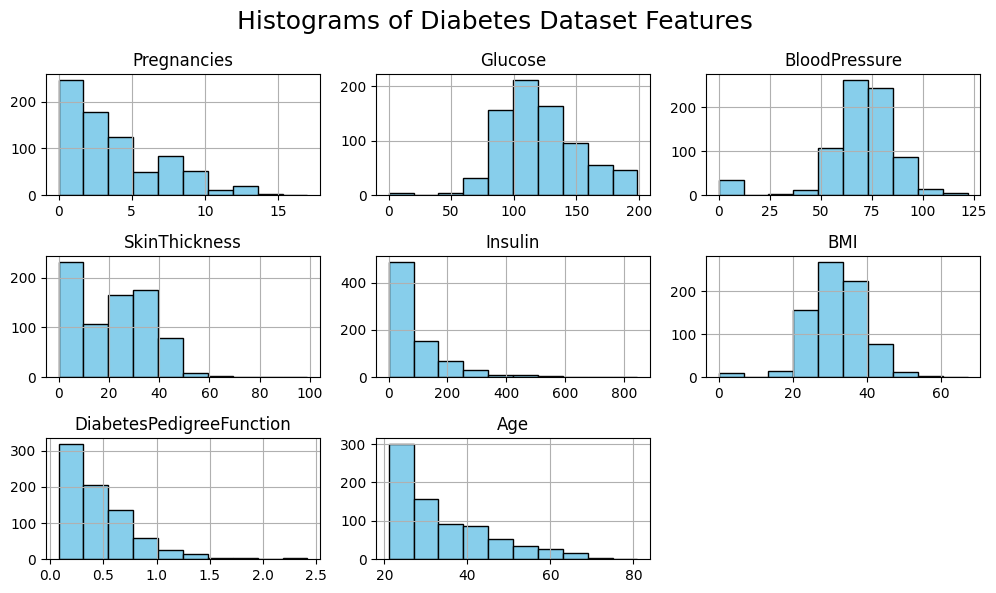

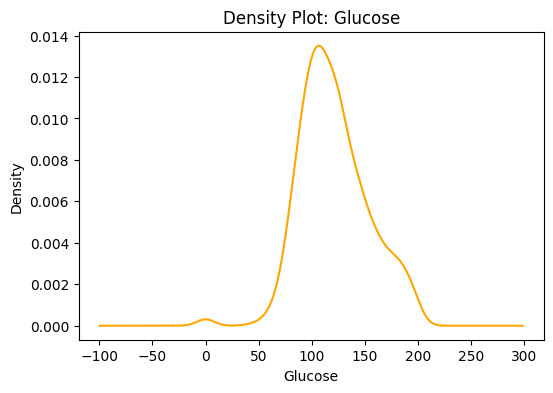

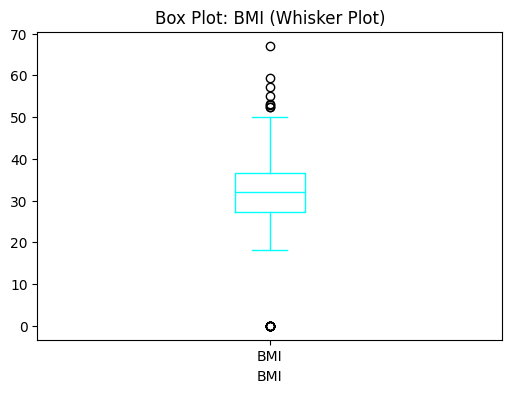

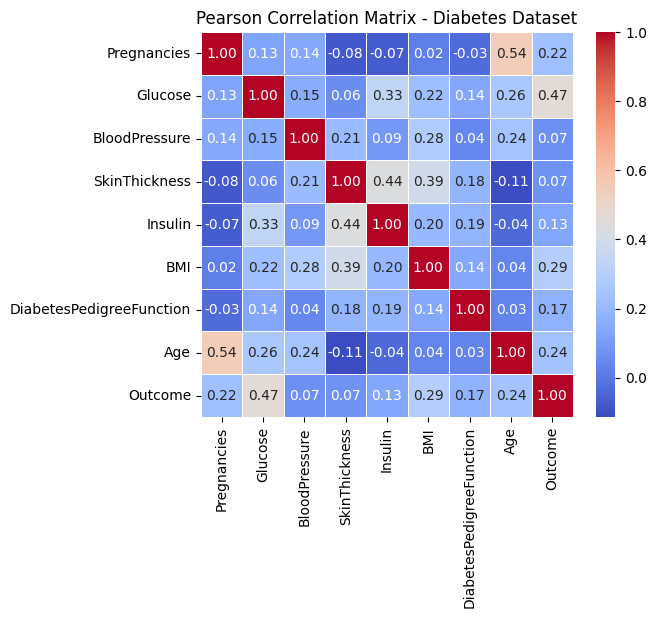

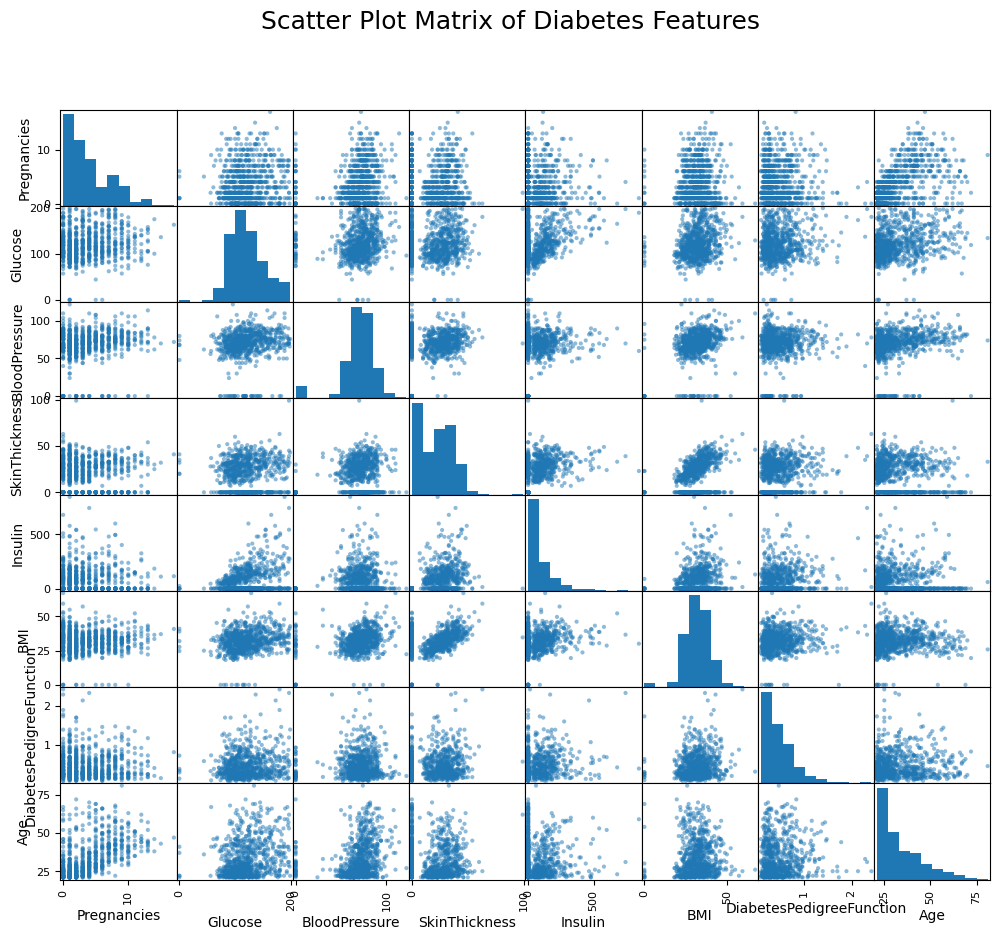

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

# Load the dataset
url = 'https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/refs/heads/master/diabetes.csv'
diabetes = pd.read_csv(url)

# 1. Histograms of Diabetes Dataset Features (excluding 'Outcome' column)
diabetes.drop(columns=['Outcome']).hist(figsize=(10, 6), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Diabetes Dataset Features", fontsize=18)
plt.tight_layout()
plt.show()

# 2. Density Plot for 'Glucose' feature
diabetes['Glucose'].plot(kind='density', figsize=(6, 4), color='orange')
plt.title('Density Plot: Glucose')
plt.xlabel('Glucose')
plt.show()

# 3. Box Plot (Whisker Plot) for 'BMI' feature
# Box plot inherently includes whiskers to show the spread of the data
diabetes['BMI'].plot(kind='box', figsize=(6, 4), color='cyan')
plt.title('Box Plot: BMI (Whisker Plot)')
plt.xlabel('BMI')
plt.show()


# $. Pearson Correlation Matrix (Heatmap)
corr_matrix = diabetes.corr(method='pearson')
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Pearson Correlation Matrix - Diabetes Dataset')
plt.show()

# 5. Scatter Plot Matrix of Diabetes Features (excluding 'Outcome')
plt.rcParams['figure.figsize'] = [12, 10]  # Set default figure size for scatter matrix
scatter_matrix(diabetes.drop(columns=['Outcome']), alpha=0.5, diagonal='hist')
plt.suptitle("Scatter Plot Matrix of Diabetes Features", fontsize=18)
plt.show()


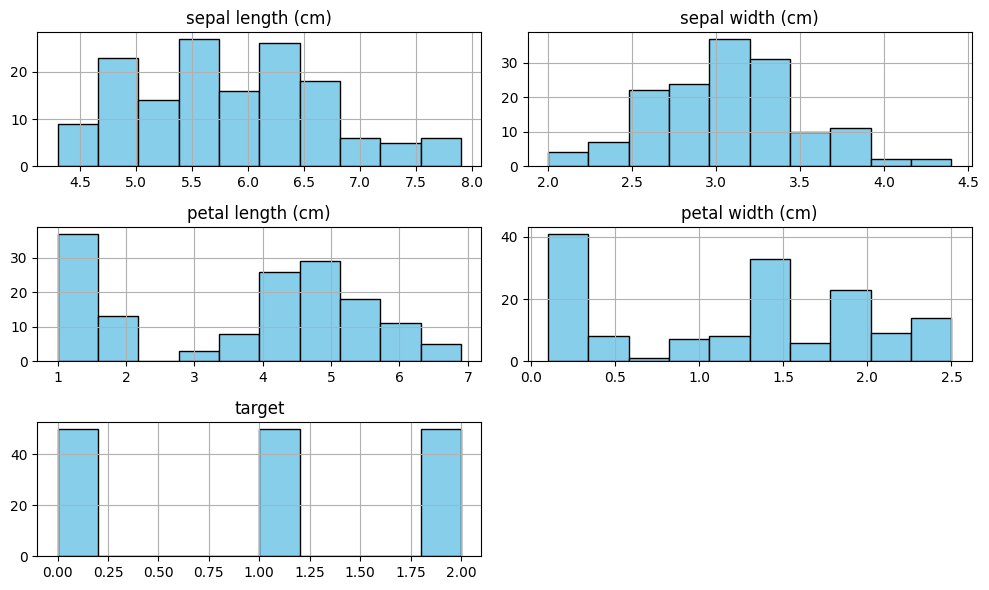

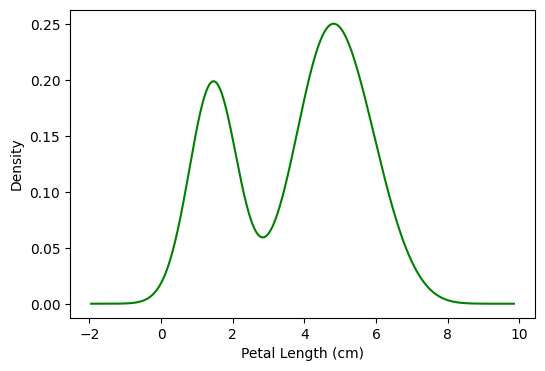

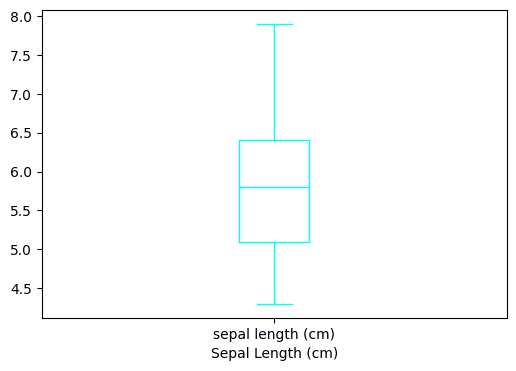

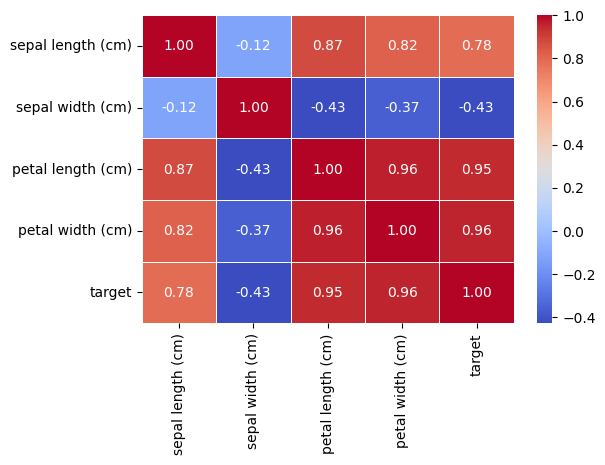

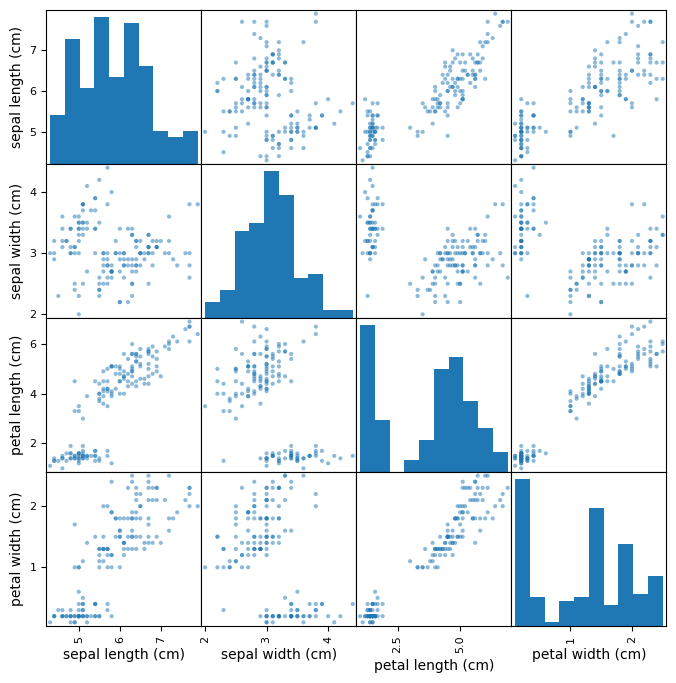

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.datasets import load_iris
iris_data = load_iris(as_frame=True)
iris = iris_data.frame
iris.hist(figsize=(10,6), color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()
iris['petal length (cm)'].plot(kind='density', figsize=(6, 4), color='green')
plt.xlabel('Petal Length (cm)')
plt.show()
iris['sepal length (cm)'].plot(kind='box', figsize=(6, 4), color='cyan')
plt.xlabel('Sepal Length (cm)')
plt.show()
corr_matrix = iris.corr(method='pearson')
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()
plt.rcParams['figure.figsize'] = [8, 8]
scatter_matrix(iris.iloc[:, :-1], alpha=0.5, diagonal='hist')
plt.show()

# PCA from sklearn and without sklearn

Original shape: (4, 4)
Orginal Components: 

[[1.1 1.2 3.4 5.4]
 [1.4 6.4 2.1 3.4]
 [4.5 8.9 2.2 4.5]
 [3.4 1.1 5.6 3.4]]
Principle components after reduction: 

[[ 3.29031636  1.54174331]
 [-2.07088116  1.41008274]
 [-4.86748627 -1.01176266]
 [ 3.64805107 -1.94006339]]


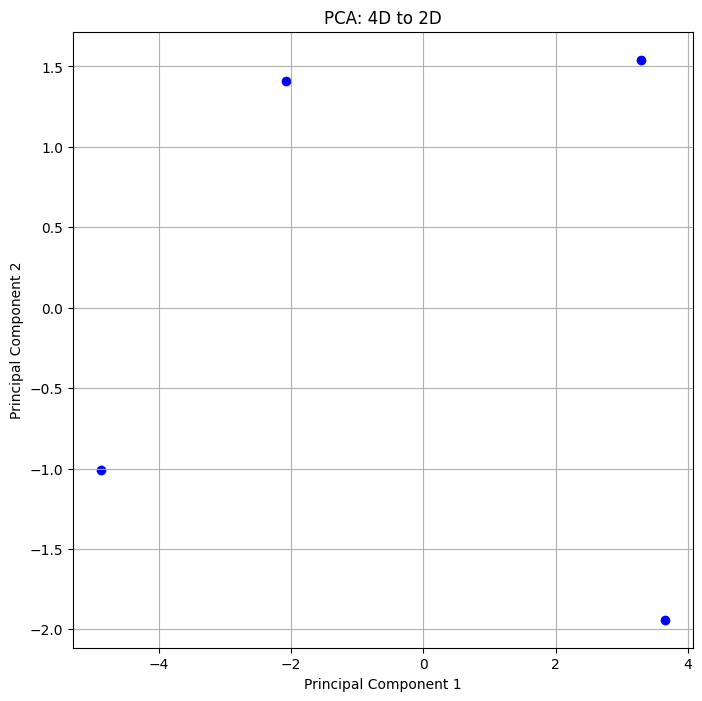

In [9]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([
    [1.1, 1.2, 3.4, 5.4],
    [1.4, 6.4, 2.1, 3.4],
    [4.5, 8.9, 2.2, 4.5],
    [3.4, 1.1, 5.6, 3.4]
], dtype=float)  # shape = (4, 4)

print("Original shape:", X.shape)

X_mean = np.mean(X,axis=0)
X_centered = X-X_mean

cov_matrix= np.cov(X_centered , rowvar = False)

eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

idx = np.argsort(eigenvalues)[::-1]
eigenvectors_s = eigenvectors[:,idx]
eigenvalues_s = eigenvalues[idx]

k = 2 #reduction dimensions
components = eigenvectors_s[:,:k]
X_r = X_centered @ components
print("Orginal Components: \n")
print(X)
print("Principle components after reduction: \n")
print(X_r)

plt.scatter(X_r[:, 0], X_r[:, 1], color='blue')
plt.title('PCA: 4D to 2D')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

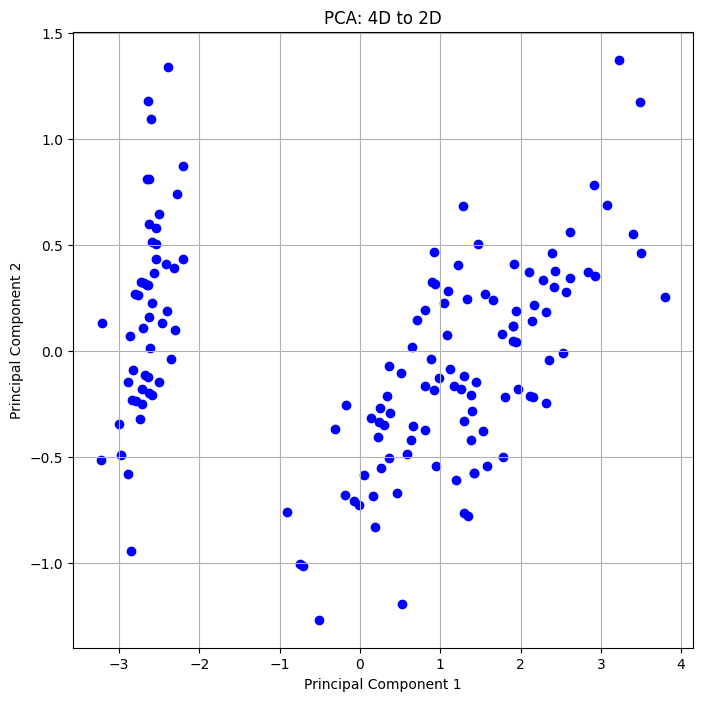

In [10]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(data = iris.data, columns= iris.feature_names)
df.head()

pca = PCA(n_components=2)
pca_clms = pca.fit_transform(df)

# print(pca_clms)

plt.scatter(pca_clms[:, 0], pca_clms[:, 1], color='blue')
plt.title('PCA: 4D to 2D')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# Decision Tree

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

iris = load_iris()
df = pd.DataFrame(data = iris.data, columns= iris.feature_names)
df.head()

x,y = df, iris.target

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state= 42)

model = DecisionTreeClassifier(criterion = 'entropy')
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.92      1.00      0.96        11
           2       1.00      0.92      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [ ]:
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

diabetes = load_diabetes()
df = pd.DataFrame(data = diabetes.data, columns= diabetes.feature_names)
df.head()

x,y = df, diabetes.target

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state= 42)

model = DecisionTreeRegressor(criterion = 'absolute_error')
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print(mean_squared_error(y_test, y_pred), r2_score(y_test,y_pred))

5928.225225225226 -0.07207193204040663


Apriori Algorithms

In [28]:
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

dataset = pd.read_csv('/content/Groceries_dataset.csv')
df = pd.DataFrame(dataset)

basket = df.groupby(['Member_number', 'Date'])['itemDescription'].apply(list).reset_index()
transactions = basket['itemDescription'].tolist()

te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_array, columns=te.columns_)

frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)
print("Total Frequent Itemsets:", frequent_itemsets.shape[0])
print(frequent_itemsets.head())


rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
print("Association Rules:", rules.shape[0])
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())


Total Frequent Itemsets: 69
    support        itemsets
0  0.021386      (UHT-milk)
1  0.033950          (beef)
2  0.021787       (berries)
3  0.016574     (beverages)
4  0.045312  (bottled beer)
Association Rules: 4
          antecedents   consequents   support  confidence      lift
0  (other vegetables)  (whole milk)  0.014837    0.121511  0.769430
1        (rolls/buns)  (whole milk)  0.013968    0.126974  0.804028
2              (soda)  (whole milk)  0.011629    0.119752  0.758296
3            (yogurt)  (whole milk)  0.011161    0.129961  0.822940


# ANN on PIMA INDIAN DATASET

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

url = 'https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/refs/heads/master/diabetes.csv'
diabetes = pd.read_csv(url)

X = diabetes.drop(columns=['Outcome'])
y = diabetes['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential()
model.add(Dense(units=12, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc:.4f}')
print(f'Test Loss: {test_loss:.4f}')

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

print("Predictions:", y_pred[:10])
print("Actual Values:", y_test[:10].values)


Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.3422 - loss: 0.8557 - val_accuracy: 0.3701 - val_loss: 0.7952
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3960 - loss: 0.7572 - val_accuracy: 0.4545 - val_loss: 0.7319
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5481 - loss: 0.7056 - val_accuracy: 0.5584 - val_loss: 0.6932
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5994 - loss: 0.6755 - val_accuracy: 0.6299 - val_loss: 0.6677
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6238 - loss: 0.6596 - val_accuracy: 0.6688 - val_loss: 0.6468
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6526 - loss: 0.6399 - val_accuracy: 0.6818 - val_loss: 0.6271
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6961 - loss: 0.6085 - val_accuracy: 0.6883 - val_loss: 0.6103
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6687 - loss: 0.6061 - val_accuracy: 0.7143 - val_loss: 0.

# Regression (linear and multiple)

FileNotFoundError: [Errno 2] No such file or directory: 'vr23-adsalab/3-1/salary_data.csv'

# K means clustering


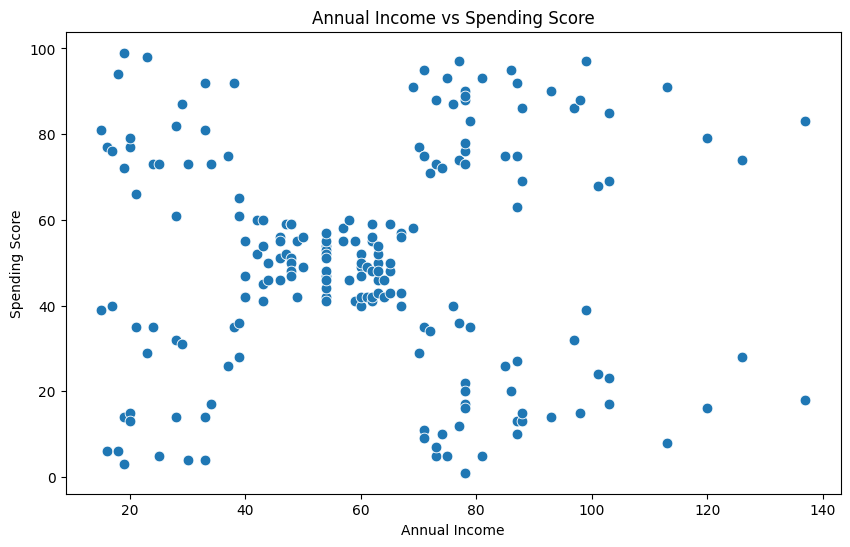

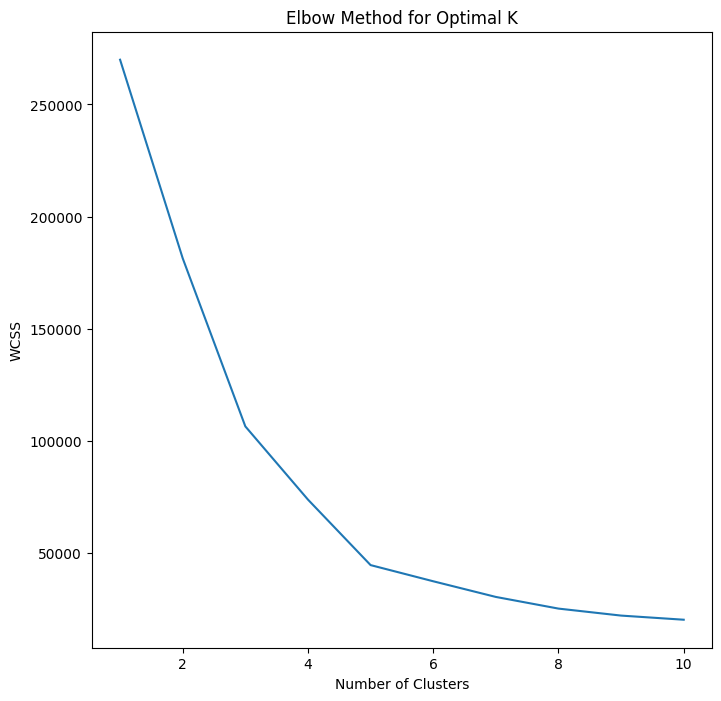

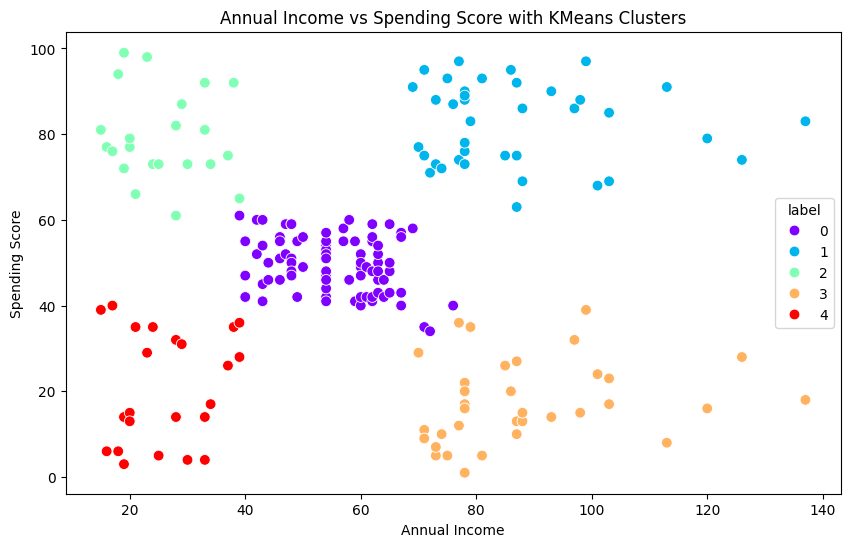

Number of customers in 1 group = 81
They are - [ 44  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 127 133 143]
--------------------------------------------
Number of customers in 2 group = 39
They are - [124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192 194
 196 198 200]
--------------------------------------------
Number of customers in 3 group = 22
They are - [ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 46]
--------------------------------------------
Number of customers in 4 group = 35
They are - [125 129 131 135 137 139 141 145 147 149 151 153 155 157 159 161 163 165
 167 169 171 173 175 177 179 181 183 185 187 1

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Load the dataset
df = pd.read_csv('/content/

# Scatter plot of Annual Income vs Spending Score
plt.figure(figsize=(10,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, s=60)
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

# Determine optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, n_init=10, random_state=42)  # n_init ensures better initialization
    km.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    wcss.append(km.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Apply KMeans with the optimal number of clusters (5 clusters from the elbow plot)
km = KMeans(n_clusters=5, n_init=10, random_state=42)
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
df['label'] = km.fit_predict(X)

# Scatter plot with clusters visualized
plt.figure(figsize=(10,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='label', palette='rainbow', data=df, s=60)
plt.title('Annual Income vs Spending Score with KMeans Clusters')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

# Display customer information for each cluster
for i in range(5):
    cluster = df[df["label"] == i]
    print(f'Number of customers in {i+1} group = {len(cluster)}')
    print('They are -', cluster["CustomerID"].values)
    print("--------------------------------------------")
